In [1]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
survey_og = pd.read_csv('survey.csv')

In [3]:
survey_og.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
survey_og = survey_og.rename(columns = {'Timestamp':'timestamp',
                                        'Age':'age',
                                        'Gender':'gender',
                                        'Country':'country'})

In [5]:
survey_og.gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [6]:
survey_og.gender.replace(to_replace = ['M','Male','male','m','Male-ish',
                                    'maile','something kinda male?','Mal',
                                    'Male (CIS)', 'Make','Guy (-ish) ^_^',
                                    'Male ','Man','msle','Mail','cis male',
                                    'Malr','Cis Man','Cis Male',
                                    'ostensibly male, unsure what that really means'],
                                    value = 'male', inplace = True)

In [7]:
survey_og.gender.unique()

array(['Female', 'male', 'female', 'Trans-female', 'Cis Female', 'F',
       'Woman', 'f', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Female ',
       'Androgyne', 'Agender', 'cis-female/femme',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer', 'Female (cis)', 'A little about you',
       'p', 'femail'], dtype=object)

In [8]:
survey_og.gender.replace(to_replace = ['Female','female','Femake','Female ',
                                       'cis-female/femme','Woman','f','woman',
                                       'femail','Female (cis)','Cis Female','F'], value = 'female',
                                       inplace = True)

In [9]:
survey_og.gender.unique()

array(['female', 'male', 'Trans-female', 'queer/she/they', 'non-binary',
       'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne',
       'Agender', 'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer', 'A little about you', 'p'], dtype=object)

In [10]:
survey_og.gender.replace(to_replace = ['Trans-female','queer/she/they','non-binary',
                                       'Nah','All','Enby','fluid','Genderqueer',
                                       'Androgyne','Agender','male leaning androgynous',
                                       'Trans woman','Neuter','Female (trans)', 'queer',
                                       'A little about you', 'p'],  value = 'other',
                                       inplace = True)

In [11]:
survey_og.gender.unique()

array(['female', 'male', 'other'], dtype=object)

In [12]:
survey_og.country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [13]:
countries = ['United States','Canada','Mexico','Switzerland',
                                   'Germany','Ireland','Poland','Austria','Italy',
                                   'Sweden','Spain','Norway','Czech Repulbic','Denmark',
                                   'Latvia','Moldova','Georgia','Romania','Finland','Bulgaria',
                                   'France','Slovenia','Russia','Bosnia and Herzegovina']
survey_og = survey_og[survey_og['country'].isin(countries)]

In [14]:
survey_og.groupby(by = survey_og.country).count()

,timestamp,age,gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
country,,,,,,,,,,,,,,,,,,,,,
Austria,3,3,3,0,3,3,3,1,3,3,...,3,3,3,3,3,3,3,3,3,0
Bosnia and Herzegovina,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
Bulgaria,4,4,4,1,3,4,4,3,4,4,...,4,4,4,4,4,4,4,4,4,0
Canada,72,72,72,0,68,72,72,63,72,72,...,72,72,72,72,72,72,72,72,72,7
Denmark,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
Finland,3,3,3,0,3,3,3,2,3,3,...,3,3,3,3,3,3,3,3,3,0
France,13,13,13,0,13,13,13,4,13,13,...,13,13,13,13,13,13,13,13,13,0
Georgia,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
Germany,45,45,45,0,45,45,45,33,45,45,...,45,45,45,45,45,45,45,45,45,8


In [15]:
survey_og.work_interfere.fillna(value = 'Not applicable', inplace = True)

In [16]:
survey_og.supervisor.isnull().value_counts()

False    962
Name: supervisor, dtype: int64

In [17]:
encoded_df = survey_og

In [18]:
encoded_df.gender = survey_og.gender.map({'male':0,'female':1,'other':2})

In [19]:
encoded_df.work_interfere = encoded_df.work_interfere.map({'Never':0,'Not Applicable':0, 'Rarely':1,'Sometimes':1,'Often':1})

In [20]:
encoded_df.care_options = encoded_df.care_options.map({'No':0,'Yes':1,'Not sure':3})

In [21]:
encoded_df.leave = encoded_df.leave.map({'Very difficult':0, 'Somewhat difficult':1, 'Don\'t know':2, 'Somewhat easy':3, 'Very easy':4})

In [22]:
encoded_df.coworkers = encoded_df.coworkers.map({'No':0, 'Yes':1, 'Some of them':2})

In [23]:
encoded_df.supervisor = encoded_df.supervisor.map({'No':0, 'Yes':1, 'Some of Them':2})

In [24]:
encoded_df

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,1,United States,IL,NaN,No,Yes,1.0,6-25,...,3,No,No,2,1.0,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,0,United States,IN,NaN,No,No,1.0,More than 1000,...,2,Maybe,No,0,0.0,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,0,Canada,NaN,NaN,No,No,1.0,6-25,...,1,No,No,1,1.0,Yes,Yes,No,No,NaN
4,2014-08-27 11:30:22,31,0,United States,TX,NaN,No,No,0.0,100-500,...,2,No,No,2,1.0,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,0,United States,TN,NaN,Yes,No,1.0,6-25,...,2,No,No,1,1.0,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,0,United States,UT,No,Yes,No,1.0,More than 1000,...,3,Maybe,Maybe,2,NaN,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,0,United States,IL,No,Yes,Yes,1.0,26-100,...,1,No,No,2,1.0,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,0,United States,CA,No,Yes,Yes,1.0,More than 1000,...,1,Yes,Yes,0,0.0,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,1,United States,NC,No,No,No,NaN,100-500,...,2,Yes,No,0,0.0,No,No,No,No,NaN


In [25]:
import parker_prep

In [26]:
parker_prep.encode_supervisor(survey_og)

0      NaN
1      NaN
2      NaN
4      NaN
5      NaN
        ..
1253   NaN
1255   NaN
1256   NaN
1257   NaN
1258   NaN
Name: supervisor, Length: 962, dtype: float64

In [27]:
survey_og

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,1,United States,IL,NaN,No,Yes,1.0,6-25,...,3,No,No,2,1.0,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,0,United States,IN,NaN,No,No,1.0,More than 1000,...,2,Maybe,No,0,0.0,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,0,Canada,NaN,NaN,No,No,1.0,6-25,...,1,No,No,1,1.0,Yes,Yes,No,No,NaN
4,2014-08-27 11:30:22,31,0,United States,TX,NaN,No,No,0.0,100-500,...,2,No,No,2,1.0,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,0,United States,TN,NaN,Yes,No,1.0,6-25,...,2,No,No,1,1.0,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,0,United States,UT,No,Yes,No,1.0,More than 1000,...,3,Maybe,Maybe,2,NaN,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,0,United States,IL,No,Yes,Yes,1.0,26-100,...,1,No,No,2,1.0,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,0,United States,CA,No,Yes,Yes,1.0,More than 1000,...,1,Yes,Yes,0,0.0,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,1,United States,NC,No,No,No,NaN,100-500,...,2,Yes,No,0,0.0,No,No,No,No,NaN


In [28]:
survey_og

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,1,United States,IL,NaN,No,Yes,1.0,6-25,...,3,No,No,2,1.0,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,0,United States,IN,NaN,No,No,1.0,More than 1000,...,2,Maybe,No,0,0.0,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,0,Canada,NaN,NaN,No,No,1.0,6-25,...,1,No,No,1,1.0,Yes,Yes,No,No,NaN
4,2014-08-27 11:30:22,31,0,United States,TX,NaN,No,No,0.0,100-500,...,2,No,No,2,1.0,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,0,United States,TN,NaN,Yes,No,1.0,6-25,...,2,No,No,1,1.0,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,0,United States,UT,No,Yes,No,1.0,More than 1000,...,3,Maybe,Maybe,2,NaN,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,0,United States,IL,No,Yes,Yes,1.0,26-100,...,1,No,No,2,1.0,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,0,United States,CA,No,Yes,Yes,1.0,More than 1000,...,1,Yes,Yes,0,0.0,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,1,United States,NC,No,No,No,NaN,100-500,...,2,Yes,No,0,0.0,No,No,No,No,NaN


In [29]:
def encoding_columns(df):
    #create a column list for for loop below:
    col_list= ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
    for col in col_list:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    return df

In [30]:
import tyler_explore

In [31]:
survey_og.head().T

,0,1,2,4,5
timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:30:22,2014-08-27 11:31:22
age,37,44,32,31,33
gender,1,0,0,0,0
country,United States,United States,Canada,United States,United States
state,IL,IN,NaN,TX,TN
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,No,Yes
treatment,Yes,No,No,No,No
work_interfere,1,1,1,0,1
no_employees,6-25,More than 1000,6-25,100-500,6-25


In [32]:
survey_og.self_employed.value_counts()

No     851
Yes     95
Name: self_employed, dtype: int64

In [33]:
survey_og.self_employed = survey_og.self_employed.fillna('No')

In [34]:
survey_og.self_employed

0       No
1       No
2       No
4       No
5       No
        ..
1253    No
1255    No
1256    No
1257    No
1258    No
Name: self_employed, Length: 962, dtype: object

In [35]:
for x in list(survey_og.columns):
    print(survey_og[x].isnull().value_counts())

False    962
Name: timestamp, dtype: int64
False    962
Name: age, dtype: int64
False    962
Name: gender, dtype: int64
False    962
Name: country, dtype: int64
False    742
True     220
Name: state, dtype: int64
False    962
Name: self_employed, dtype: int64
False    962
Name: family_history, dtype: int64
False    962
Name: treatment, dtype: int64
False    769
True     193
Name: work_interfere, dtype: int64
False    962
Name: no_employees, dtype: int64
False    962
Name: remote_work, dtype: int64
False    962
Name: tech_company, dtype: int64
False    962
Name: benefits, dtype: int64
False    962
Name: care_options, dtype: int64
False    962
Name: wellness_program, dtype: int64
False    962
Name: seek_help, dtype: int64
False    962
Name: anonymity, dtype: int64
False    962
Name: leave, dtype: int64
False    962
Name: mental_health_consequence, dtype: int64
False    962
Name: phys_health_consequence, dtype: int64
False    962
Name: coworkers, dtype: int64
False    686
True     276
Nam

In [36]:
survey_og.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [37]:
survey_og.coworkers.isnull().value_counts()

False    962
Name: coworkers, dtype: int64

In [38]:
survey_og.obs_consequence.isnull().value_counts()

False    962
Name: obs_consequence, dtype: int64

In [39]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [40]:
survey_og['age'] = remove_outlier_IQR(survey_og['age'])

In [41]:
cat_vars = survey_og.drop(columns = ['timestamp','age', 'comments'])

In [42]:
quant_vars = pd.DataFrame(survey_og['age'])

gender 
_____________________

        chi2   p-value  degrees of freedom
0  15.036819  0.000543                   2

observed:
 work_interfere  0.0  1.0  All
gender                       
0               142  439  581
1                20  156  176
2                 1   11   12
All             163  606  769

expected:
             0           1
0  123.150845  457.849155
1   37.305592  138.694408
2    2.543563    9.456437


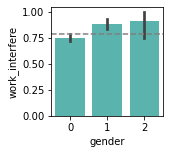


_____________________

country 
_____________________

        chi2   p-value  degrees of freedom
0  15.452054  0.630729                  18

observed:
 work_interfere          0.0  1.0  All
country                              
Austria                   0    1    1
Bosnia and Herzegovina    0    1    1
Bulgaria                  1    2    3
Canada                   16   47   63
Denmark                   0    2    2
Finland                   1    1    2
France                    2    2    4
Georgia                   0    1    1
Germany                   4   29   33
Ireland                   6   17   23
Italy                     3    3    6
Mexico                    1    1    2
Moldova                   0    1    1
Poland                    1    6    7
Russia                    1    1    2
Slovenia                  0    1    1
Sweden                    0    5    5
Switzerland               2    3    5
United States           125  482  607
All                     163  606  769

expected:

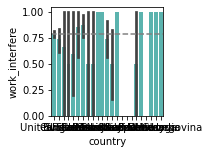


_____________________

state 
_____________________

        chi2   p-value  degrees of freedom
0  48.517504  0.226847                  42

observed:
 work_interfere  0.0  1.0  All
state                        
AL                1    7    8
AZ                0    5    5
CA               20   97  117
CO                5    3    8
CT                1    2    3
DC                1    1    2
FL                3    9   12
GA                5    6   11
IA                1    2    3
ID                0    1    1
IL                3   22   25
IN                6   15   21
KS                2    0    2
KY                1    2    3
LA                0    1    1
MA                4   12   16
MD                1    3    4
ME                0    1    1
MI                3   15   18
MN                5   11   16
MO                3    5    8
MS                0    1    1
NC                1   10   11
NE                1    1    2
NH                1    2    3
NJ                1    4    5
NV      

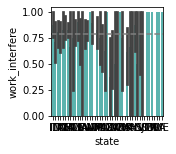


_____________________

self_employed 
_____________________

       chi2   p-value  degrees of freedom
0  0.102329  0.749053                   1

observed:
 work_interfere  0.0  1.0  All
self_employed                
No              144  543  687
Yes              19   63   82
All             163  606  769

expected:
             0           1
0  145.618986  541.381014
1   17.381014   64.618986


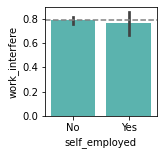


_____________________

family_history 
_____________________

        chi2       p-value  degrees of freedom
0  65.680998  5.301456e-16                   1

observed:
 work_interfere  0.0  1.0  All
family_history               
No              132  272  404
Yes              31  334  365
All             163  606  769

expected:
           0          1
0  85.63329  318.36671
1  77.36671  287.63329


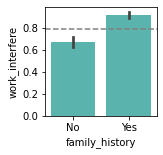


_____________________

treatment 
_____________________

         chi2       p-value  degrees of freedom
0  227.257213  2.363273e-51                   1

observed:
 work_interfere  0.0  1.0  All
treatment                    
No              139  130  269
Yes              24  476  500
All             163  606  769

expected:
             0           1
0   57.018205  211.981795
1  105.981795  394.018205


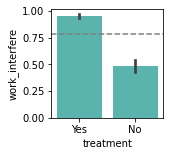


_____________________

work_interfere 
_____________________

         chi2        p-value  degrees of freedom
0  763.024884  5.906839e-168                   1

observed:
 work_interfere  0.0  1.0  All
work_interfere               
0.0             163    0  163
1.0               0  606  606
All             163  606  769

expected:
             0           1
0   34.550065  128.449935
1  128.449935  477.550065


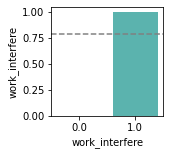


_____________________

no_employees 
_____________________

       chi2   p-value  degrees of freedom
0  7.543373  0.183262                   5

observed:
 work_interfere  0.0  1.0  All
no_employees                 
1-5              18   81   99
100-500          21   88  109
26-100           42  144  186
500-1000         13   22   35
6-25             27  125  152
More than 1000   42  146  188
All             163  606  769

expected:
            0           1
0  20.984395   78.015605
1  23.104031   85.895969
2  39.425228  146.574772
3   7.418726   27.581274
4  32.218466  119.781534
5  39.849155  148.150845


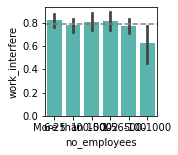


_____________________

remote_work 
_____________________

       chi2   p-value  degrees of freedom
0  0.692892  0.405183                   1

observed:
 work_interfere  0.0  1.0  All
remote_work                  
No              117  412  529
Yes              46  194  240
All             163  606  769

expected:
             0           1
0  112.128739  416.871261
1   50.871261  189.128739


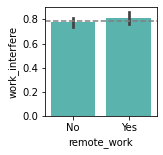


_____________________

tech_company 
_____________________

       chi2   p-value  degrees of freedom
0  0.014851  0.903006                   1

observed:
 work_interfere  0.0  1.0  All
tech_company                 
No               29  103  132
Yes             134  503  637
All             163  606  769

expected:
             0           1
0   27.979194  104.020806
1  135.020806  501.979194


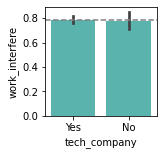


_____________________

benefits 
_____________________

       chi2   p-value  degrees of freedom
0  5.876515  0.052958                   2

observed:
 work_interfere  0.0  1.0  All
benefits                     
Don't know       58  158  216
No               35  141  176
Yes              70  307  377
All             163  606  769

expected:
            0           1
0  45.784135  170.215865
1  37.305592  138.694408
2  79.910273  297.089727


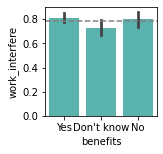


_____________________

care_options 
_____________________

        chi2   p-value  degrees of freedom
0  13.459545  0.001195                   2

observed:
 work_interfere  0.0  1.0  All
care_options                 
0                58  196  254
1                52  281  333
3                53  129  182
All             163  606  769

expected:
            0           1
0  53.838752  200.161248
1  70.583875  262.416125
2  38.577373  143.422627


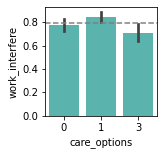


_____________________

wellness_program 
_____________________

       chi2   p-value  degrees of freedom
0  8.695997  0.012933                   2

observed:
 work_interfere    0.0  1.0  All
wellness_program               
Don't know         36   79  115
No                 92  397  489
Yes                35  130  165
All               163  606  769

expected:
             0           1
0   24.375813   90.624187
1  103.650195  385.349805
2   34.973992  130.026008


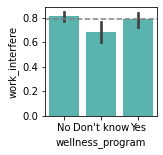


_____________________

seek_help 
_____________________

       chi2   p-value  degrees of freedom
0  9.035599  0.010913                   2

observed:
 work_interfere  0.0  1.0  All
seek_help                    
Don't know       64  167  231
No               63  299  362
Yes              36  140  176
All             163  606  769

expected:
            0           1
0  48.963589  182.036411
1  76.730819  285.269181
2  37.305592  138.694408


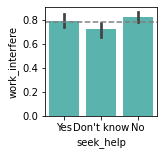


_____________________

anonymity 
_____________________

      chi2   p-value  degrees of freedom
0  6.54229  0.037963                   2

observed:
 work_interfere  0.0  1.0  All
anonymity                    
Don't know      119  377  496
No                5   27   32
Yes              39  202  241
All             163  606  769

expected:
             0           1
0  105.133940  390.866060
1    6.782835   25.217165
2   51.083225  189.916775


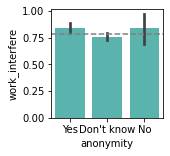


_____________________

leave 
_____________________

       chi2   p-value  degrees of freedom
0  13.85724  0.007765                   4

observed:
 work_interfere  0.0  1.0  All
leave                        
0                 5   64   69
1                13   71   84
2                89  260  349
3                32  129  161
4                24   82  106
All             163  606  769

expected:
            0           1
0  14.625488   54.374512
1  17.804941   66.195059
2  73.975293  275.024707
3  34.126138  126.873862
4  22.468140   83.531860


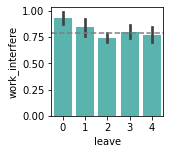


_____________________

mental_health_consequence 
_____________________

        chi2   p-value  degrees of freedom
0  11.288265  0.003538                   2

observed:
 work_interfere             0.0  1.0  All
mental_health_consequence               
Maybe                       64  239  303
No                          73  202  275
Yes                         26  165  191
All                        163  606  769

expected:
            0           1
0  64.224967  238.775033
1  58.289987  216.710013
2  40.485046  150.514954


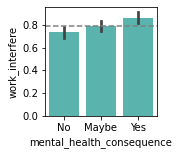


_____________________

phys_health_consequence 
_____________________

       chi2   p-value  degrees of freedom
0  1.766755  0.413384                   2

observed:
 work_interfere           0.0  1.0  All
phys_health_consequence               
Maybe                     28  133  161
No                       126  441  567
Yes                        9   32   41
All                      163  606  769

expected:
             0           1
0   34.126138  126.873862
1  120.183355  446.816645
2    8.690507   32.309493


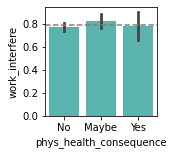


_____________________

coworkers 
_____________________

       chi2   p-value  degrees of freedom
0  0.589751  0.744624                   2

observed:
 work_interfere  0.0  1.0  All
coworkers                    
0                36  118  154
1                26  104  130
2               101  384  485
All             163  606  769

expected:
             0           1
0   32.642393  121.357607
1   27.555267  102.444733
2  102.802341  382.197659


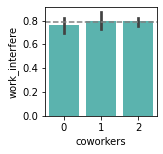


_____________________

supervisor 
_____________________

       chi2   p-value  degrees of freedom
0  6.149602  0.013144                   1

observed:
 work_interfere  0.0  1.0  All
supervisor                   
0.0              38  207  245
1.0              71  218  289
All             109  425  534

expected:
            0           1
0  50.009363  194.990637
1  58.990637  230.009363


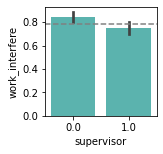


_____________________

mental_health_interview 
_____________________

       chi2   p-value  degrees of freedom
0  8.196574  0.016601                   2

observed:
 work_interfere           0.0  1.0  All
mental_health_interview               
Maybe                     34   74  108
No                       124  516  640
Yes                        5   16   21
All                      163  606  769

expected:
             0           1
0   22.892068   85.107932
1  135.656697  504.343303
2    4.451235   16.548765


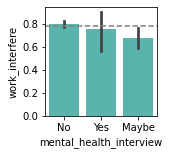


_____________________

phys_health_interview 
_____________________

       chi2   p-value  degrees of freedom
0  1.834845  0.399547                   2

observed:
 work_interfere         0.0  1.0  All
phys_health_interview               
Maybe                   73  254  327
No                      72  260  332
Yes                     18   92  110
All                    163  606  769

expected:
            0           1
0  69.312094  257.687906
1  70.371912  261.628088
2  23.315995   86.684005


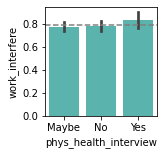


_____________________

mental_vs_physical 
_____________________

       chi2   p-value  degrees of freedom
0  8.452888  0.014604                   2

observed:
 work_interfere      0.0  1.0  All
mental_vs_physical               
Don't know           83  268  351
No                   31  185  216
Yes                  49  153  202
All                 163  606  769

expected:
            0           1
0  74.399220  276.600780
1  45.784135  170.215865
2  42.816645  159.183355


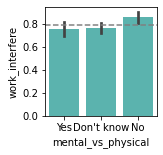


_____________________

obs_consequence 
_____________________

       chi2   p-value  degrees of freedom
0  5.477372  0.019264                   1

observed:
 work_interfere   0.0  1.0  All
obs_consequence               
No               150  512  662
Yes               13   94  107
All              163  606  769

expected:
             0           1
0  140.319896  521.680104
1   22.680104   84.319896


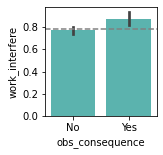


_____________________

age 
____________________



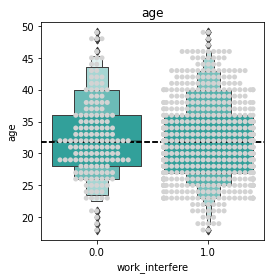

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0.0             153.0  32.333333  6.385634  18.0  28.0  32.0  36.0  49.0
1.0             592.0  31.957770  6.398755  18.0  27.0  32.0  36.0  49.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=52690.5, pvalue=0.189334518305165)

____________________



In [43]:
tyler_explore.explore_bivariate(survey_og, 'work_interfere', cat_vars.columns, quant_vars.columns)

In [44]:
survey_og.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [45]:
cat1 = survey_og[['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history']]
cat2 = survey_og[['treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options']]
cat3 = survey_og[['wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence']]
cat4 = survey_og[['coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]

In [ ]:
tyler_explore.explore_multivariate(survey_og, 'work_interfere', cat1.columns, quant_vars.columns)

printing swarmgrid...
